IMPORT LIBRARY DAN DATASHEET



In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [ ]:
df = pd.read_csv('sample_data/suhu.csv')
df.head()

,humidity,temperature,status
0,68.0,32.3,NORMAL
1,68.0,32.2,NORMAL
2,68.0,32.2,NORMAL
3,68.0,32.2,NORMAL
4,68.0,32.2,NORMAL


MEMFORMAT DATASET KE BENTUK FEATURE SETS(KUMPULAN ATRIBUT)

In [ ]:
df.columns

Index(['humidity', 'temperature', 'status'], dtype='object')

CONVERT FORMAT DATA FRAME PANDAS KE ARRAY NUMPY

In [ ]:
X = df[['humidity','temperature']].values
X[0:5]

array([[68. , 32.3],
       [68. , 32.2],
       [68. , 32.2],
       [68. , 32.2],
       [68. , 32.2]])

In [ ]:
y = df['status'].values
y[0:5]

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL'], dtype=object)

NORMALISASI DATA

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.17650612, -1.11673526],
       [ 1.17650612, -1.187305  ],
       [ 1.17650612, -1.187305  ],
       [ 1.17650612, -1.187305  ],
       [ 1.17650612, -1.187305  ]])

MEMBAGI DATA TRAINING DAN DATA TEST. 
BANYAKNYA DATA TRAINING 80% DAN DATA TEST 20%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 2) (136,)
Test set: (35, 2) (35,)


MENGECEK PERSEBARAN DATA

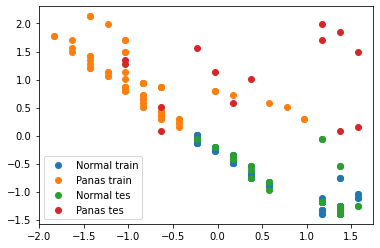

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X_train[ np.nonzero(y_train == 'NORMAL'), 0 ], X_train[ np.nonzero(y_train == 'NORMAL'), 1 ])
plt.scatter(X_train[ np.nonzero(y_train == 'PANAS'), 0 ], X_train[ np.nonzero(y_train == 'PANAS'), 1 ])
plt.scatter(X_test[ np.nonzero(y_test == 'NORMAL'), 0 ], X_test[ np.nonzero(y_test == 'NORMAL'), 1 ])
plt.scatter(X_train[ np.nonzero(y_test== 'PANAS'), 0 ], X_test[ np.nonzero(y_test == 'PANAS'), 1 ])
plt.legend(['Normal train', 'Panas train', 'Normal tes', 'Panas tes'])
plt.show()

KLASIFIKASI K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:

hasil = knn.predict(X_test)

hasil

array(['NORMAL', 'PANAS', 'PANAS', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'PANAS', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'PANAS', 'NORMAL', 'PANAS', 'PANAS',
       'NORMAL', 'PANAS', 'PANAS', 'PANAS', 'PANAS', 'NORMAL', 'PANAS',
       'PANAS', 'NORMAL', 'PANAS', 'NORMAL', 'PANAS', 'NORMAL', 'NORMAL',
       'PANAS'], dtype=object)

PEMBUKTIAN EVALUASI MODEL DENGAN CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

actual = y_test;
predicted =  knn.predict(X_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))


Confusion matrix : 
 [[20  1]
 [ 0 14]]
Accuracy_Score :  0.9714285714285714
Recall_Score :  [0.95238095 1.        ]
precision_Score :  [1.         0.93333333]
F1_Score :  [0.97560976 0.96551724]
Report : 
               precision    recall  f1-score   support

      NORMAL       1.00      0.95      0.98        21
       PANAS       0.93      1.00      0.97        14

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.97        35
weighted avg       0.97      0.97      0.97        35



In [ ]:


actual = y_train;
predicted =  knn.predict(X_train)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[72  1]
 [ 0 63]]
Accuracy_Score :  0.9926470588235294
Recall_Score :  [0.98630137 1.        ]
precision_Score :  [1.       0.984375]
F1_Score :  [0.99310345 0.99212598]
Report : 
               precision    recall  f1-score   support

      NORMAL       1.00      0.99      0.99        73
       PANAS       0.98      1.00      0.99        63

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136

